##### Heaps (6.1)
## Formal characteristics
- Attributes
    - length (size of the array)
    - heap-size (size of the subarray that are in a heap; can be 0)

- Properties of all heaps
    - $A[i].parent$ = $A[\lfloor i/2 \rfloor]$
    - $A[i].leftChild$ = $A[i*2]$
    - $A[i].rightChild$ = $A[i*2 + 1]$
    - Viewed as a tree
        - The height of a node in a heap is the number of edges on the longest simple downward path from the node to a leaf
        ```
              1               height = 3
            /   \
           2     8            height = 2
          / \   / \
         3   4  9  10         height = 1
        ```

- Properties of `min-heaps`
    - *min heap property*: $A[i].parent \leq A[i]$

- Properties of `max-heaps`
    - *max heap property*: $A[i].parent \geq A[i]$

- Procedures
    - $MaxHeapify$
        - Time complexity: $O(\lg n)$
        - Maintains the max-heap property
    - $BuildMaxHeap$
        - Time complexity: $O(n)$
        - Converts any array to a max-heap
    - $Heapsort$
        - Time complexity: $O(n \lg n)$
        - Sorts an array in place 
    - Priority queue procedures:
        - $MaxHeapInsert$
            - Time complexity: $O(\lg n)$
        - $HeapExtractMax$
            - Time complexity: $O(\lg n)$
        - $HeapIncreaseKey$
            - Time complexity: $O(\lg n)$
        - $HeapMaximum$
            - Time complexity: $O(\lg n)$

## Usage
- min heaps: priority queues
- max heaps: heapsort

In [1]:
from abc import ABC, abstractmethod
from typing import Callable
import inspect 
from binarytree import build

class Heap(ABC):
    def __init__(self, ls):
        self.ls = ls
        self.length = len(ls)
        self.heapsize = 1
        head = build(ls)
        assert head
        self.digraphs = [head.graphviz()]

    def __getitem__(self, i):
        return self.ls[int(i)]

    def __setitem__(self, i, v):
        self.ls[int(i)] = v

    def __repr__(self):
        return f'{self.classname()} {self.ls}, heapsize: {self.heapsize}'

    @abstractmethod
    def classname(self) -> str:
        ...

    @abstractmethod
    def heap_property_violation(self, i) -> int|None:
        '''
        Describes the appropriate relationship
        between parents and children in the heap.

        :param int i: parent index, to which derived child-indices are compared
        :return: the index of the value that ought to be swapped for the value at self[i]
        :rtype: int|None
        '''
        ...

    def heapify(self, i):
        '''
        Bubbles down values that produce a heap-property violation, starting at index i

        :param int i: parent index of the heap or subheap that will be walked.
        '''

        ...

    def build(self):
        '''
        Transforms an unsorted self.ls into a heap
        that abides by the heap-property
        '''
        ...

    def sort(self):
        '''
        Takes self.heapsize from self.length to 1, while reordering self.ls
        MaxHeap will give an ascending total order.
        MinHeap will give a descending total order.
        '''

        ...

    def bubbleup(self, i):
        '''
        Recursively increases the height of a value in the heap, until its
        relation to its parent no longer violates self.heap_prop

        :param int i: index, from which a parent-index is derived
        '''
        ...

    def insert(self, val):
        '''
        Adds a new value to the heap, in a spot that satisfies self.heap_prop

        :param val: comparable value to insert
        '''
        ...

    def peek(self):
        ...

    def pop(self):
        ...
        
    def delete(self, i):
        '''
        Removes a value from the heap and rebalances the heap accordingly

        :param int i: index to remove
        '''
        ...
        
    def _idx(self, i, fx:Callable[[int], int], basis=None):
        idx = fx(i+1) - 1
        if basis == 'length':
            return idx if idx > -1 and idx < self.length else None
        else:
            return idx if idx > -1 and idx < self.heapsize else None

    def left(self, i, basis=None):
        return self._idx(i, lambda x: x*2, basis)

    def right(self, i, basis=None):
        return self._idx(i, lambda x: x*2 + 1, basis)

    def parent(self, i, basis=None):
        return self._idx(i, lambda x: x//2, basis)

    def swap(self, head_idx, tail_idx):
        self.highlight_edge(head_idx, tail_idx, color="red")
        temp = self[head_idx]
        self[head_idx] = self[tail_idx]
        self[tail_idx] = temp
        self.highlight_edge(head_idx, tail_idx, color="green")
        self.retree_animation()

    def to_gif(self, size=500):
        ...

    def retree_animation(self):
        ...

    def untree_animation(self):
        ...

    def to_digraph(self, comment="Heap Digraph", label=None, highlights=None):
        ...

class MaxHeap(Heap):
    def classname(self):
        return __class__.__name__

    def heap_property_violation(self, i):
        li = self.left(i)
        ri = self.right(i)
        idx = i
        if li and self[li] > self[i]:
            idx = li
        if ri and self[ri] > self[i]:
            idx = ri
        return idx if not idx == i else None

class MinHeap(Heap):
    def classname(self):
        return __class__.__name__
        
    def heap_property_violation(self, i):
        li = self.left(i)
        ri = self.right(i)
        idx = i
        if li and self[li] < self[i]:
            idx = li
        if ri and self[ri] < self[i]:
            idx = ri
        return idx if not idx == i else None


## Excercises 
### Min/max cardinality of heap of height $h$ (6.1-1)
- max: $2^h$
- min: $2^{h-1} + 1$
- max number of nodes at a given height: $\lceil n/2^{h+1} \rceil$

### Show that an $n$-element heap has a height of $\lfloor \lg n \rfloor$ (6.1-2)
1. $\text{Base case}$: a 0-element heap trivially has a height of $\lfloor \lg n \rfloor$
2. $\text{Inductive hypothesis (IH)}$: $n$-element heap has a height of $\lfloor \lg n \rfloor$
3. $\text{Induction steps}$
    1. Let us assume $IH$ holds for $n$, and prove it for $n+1$.
    2. A parent node may have a maximum of 2 children
    3. We know that a min-heap like `[1,2,3]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    4. We know that a min-heap like `[1,2]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    5. We know that a min-heap like `[1]` has a height of 0 ($\lg 1$)
    6. We observe that this pattern would fan out across all children in the range of $2^i..2^{i+1}$
    7. $\therefore$ we know that an $n$-element heap has a height of $\lfloor \lg n \rfloor$
       $QED$

### Where in a max heap might the smallest element reside (6.1-4)
Assuming elements are distinct, and that the heap is balanced, the smallest element might be an element in the last $x$ elements of the heap, where $x = 2^{(\lfloor \lg n\rfloor)}$ ... but consider `[16,4,10,14,7,9,1,3,8,2]`

### Visualization code

In [2]:
import dotenv

dotenv.load_dotenv()

True

In [3]:
import graphviz
from graphviz import Digraph
from IPython.display import display_markdown, SVG, display_svg
import pydot
from wand.image import Image
import hashlib
import os

def retree_animation(self, only_heap=True):
    """
    Resets the animation frame to the current state of self.ls,
    represented as a tree
    """

    next = build(self.ls[0:self.heapsize]) if only_heap else build(self.ls[0:self.length])
    assert next
    self.digraphs.append(next.graphviz())
Heap.retree_animation = retree_animation
del retree_animation

def untree_animation(self) -> graphviz.Digraph:
    """
    Resets the animation frame to the current state of self.ls,
    represented as an array
    """

    digraph = graphviz.Digraph()
    digraph.attr(kv="node", shape="record")
    digraph.attr(kv="node", rankdir="LR")
    digraph.node(name=str(self.ls[0]), label=str(self.ls[0]))
    if len(self.ls) > 1:
        for i, v in enumerate(self.ls[1:]):
            digraph.node(name=str(v), label=str(v))
            digraph.edge(head_name=str(self[i]), tail_name=str(v))
    self.digraphs.append(digraph)
    return digraph
Heap.untree_animation = untree_animation
del untree_animation

def highlight_edge(self, head_idx, tail_idx, color="red"):
    self.retree_animation()
    next = build(self.ls)
    assert next
    gv = next.graphviz()
    data = pydot.graph_from_dot_data(gv.source)
    assert data
    nodes: list[pydot.core.Node] = data[0].get_nodes()
    tails = list(
        filter(
            lambda node: node.get_attributes().get("label")
            == f'"<l>|<v> {self[tail_idx]}|<r>"',
            nodes,
        )
    )
    assert len(tails) > 0
    tail: pydot.Node = tails[0]
    heads = list(
        filter(
            lambda node: node.get_attributes().get("label")
            == f'"<l>|<v> {self[head_idx]}|<r>"',
            nodes,
        )
    )
    assert len(heads) > 0
    head: pydot.Node = heads[0]
    gv.edge(tail_name=tail.get_name(), head_name=head.get_name(), color=color)
    self.digraphs.append(gv)
Heap.highlight_edge = highlight_edge
del highlight_edge

_assets_dir = lambda self,digest: f"assets/wand/{self.classname()}/{digest}"
def make_gif(self, size=500) -> tuple(str, str):
    digest = hashlib.sha256(str(self.ls).encode()).hexdigest()[:8]
    assets_dir = _assets_dir(self,digest)
    gif = f"{assets_dir}/graph.gif"
    with Image() as img:
        img.loop = 1
        try:
            os.makedirs(assets_dir, exist_ok=False)
            for i, digraph in enumerate(self.digraphs):
                path = digraph.render(
                    filename=f"frame-{i}",
                    directory=assets_dir,
                    format="png",
                    cleanup=True,
                    overwrite_source=True,
                )
                frame = Image(filename=path, width=size, height=size)
                frame.delay = 60
                img.sequence.append(frame)
            img.type = "optimize"
            img.save(filename=gif)
            return (gif or '',digest or '')
        except FileExistsError:
            return ('','')
Heap.make_gif = make_gif
del make_gif

def to_gif(self:Heap, size=500):
    gif,digest = self.make_gif(size)
    last_state = self.digraphs[-1].render(
        directory=_assets_dir(self, digest),
        filename="last-state",
        format="svg",
        overwrite_source=True,
    )
    display_markdown("**Swapping process**", raw=True)
    display_markdown(f"![]({gif})", raw=True)
    display_markdown("**Final result**", raw=True)
    display_markdown(f"![]({last_state})", raw=True)
Heap.to_gif = to_gif
del to_gif

def log(self, *args):
    cur = inspect.currentframe()
    outer = map(lambda o: o.code_context, inspect.getouterframes(frame=cur))
    caller = str.strip(list(outer)[2][0])
    if cur:
        print(f"[{caller}] {args}")
Heap.log = log
del log

def highlight_nodes(self:Heap, indices:list[int]):
    self.retree_animation(only_heap=False)
    graphs = pydot.graph_from_dot_data(self.digraphs[-1].source)
    get_label = lambda node: node.get_attributes().get("label")
    label_tpl = lambda heap, idx: f'"<l>|<v> {heap[idx]}|<r>"'
    digraph = graphs[0]
    nodelist = digraph.get_node_list()
    labels = [label_tpl(self, idx) for idx in indices]
    for node in nodelist:
        if 'label' in node.get_attributes() and get_label(node) in labels:
            node.set_color('green')
    svg = digraph.create_svg()
    display_svg(SVG(svg))
Heap.highlight_nodes = highlight_nodes
del highlight_nodes

def maxheap(ls=[5,3,4,2,1,55,33,22,44,11]):
     return MaxHeap(ls)
    
def minheap(ls=[5,3,4,2,1,55,33,22,44,11]):
     return MinHeap(ls)

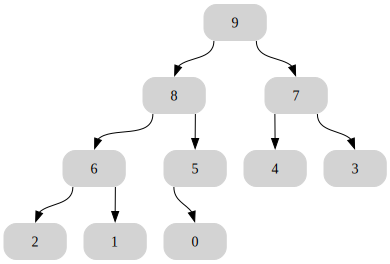

In [4]:
ls = list(reversed(range(0,10)))
first_leaf = len(ls) // 2
MaxHeap(ls.copy()).digraphs[-1]

*Interesting:*
`ls.length` | 0-idx first leaf | calculated
---|---|---
1  | 0 | $\lfloor 1 \div 2 \rfloor$
2  | 1 | $\lfloor 2 \div 2 \rfloor$
3  | 1 | $\lfloor 3 \div 2 \rfloor$
4  | 2 | $\lfloor 4 \div 2 \rfloor$
5  | 2 | $\lfloor 5 \div 2 \rfloor$
6  | 3 | $\lfloor 6 \div 2 \rfloor$
7  | 3 | $\lfloor 7 \div 2 \rfloor$
8  | 4 | $\lfloor 8 \div 2 \rfloor$
9  | 4 | $\lfloor 9 \div 2 \rfloor$
10 | 5 | $\lfloor 10 \div 2 \rfloor$
11 | 5 | $\lfloor 11 \div 2 \rfloor$

Generally: $\text{First-0-indexed-Leaf} = \lfloor ls.length \div 2 \rfloor$

### Is a asc-sorted array always a min-heap?
Yes!


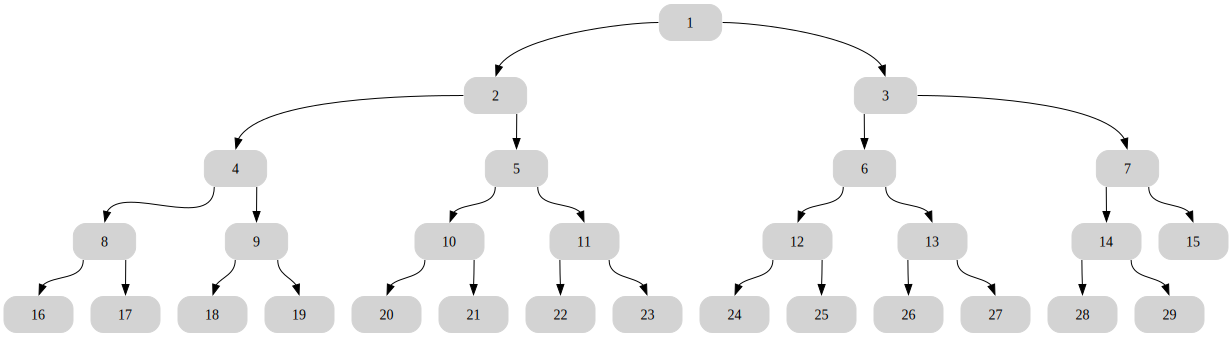

In [5]:
h = MinHeap(list(range(1, 30)))
h.digraphs[-1]

# Maintaining the heap-property (6.2)
To maintain the heap property, we call `heapify`.

In [6]:
def heapify(self:Heap, i):
    idx = self.heap_property_violation(i)
    if idx:
        self.swap(i, idx)
        self.heapify(idx)
Heap.heapify = heapify
del heapify

## Bubble up
- When a key is not in the right relation with its parent, swap it with its parent
## Bubble down
- When a key is not in the right relation with its children, swap it with one of its children
    - min-heap: swap with smallest child
    - max-heap: swap with biggest child

Time complexity: $O(\lg n)$

## Exercises
### Illustrate `max_heapify` (6.2-1)
We want to max-heapify this tree: `[27,17,3,16,13,10,1,5,7,12,4,8,9,0]` where 3 is out of place.

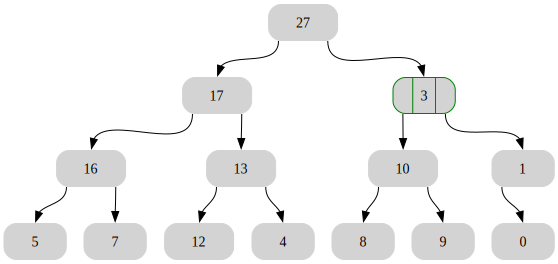

'None'

In [7]:
ls = [27,17,3,16,13,10,1,5,7,12,4,8,9,0]
h = MaxHeap(ls.copy())
digraph = h.highlight_nodes([2])
str(digraph)

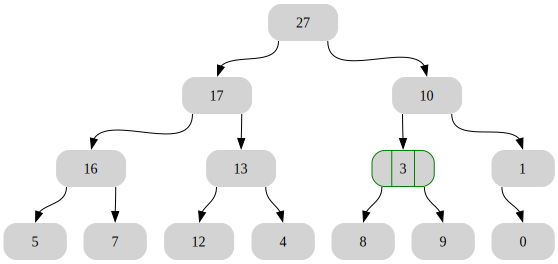

In [8]:
h.swap(2,5)
h.retree_animation()
h.highlight_nodes([5])

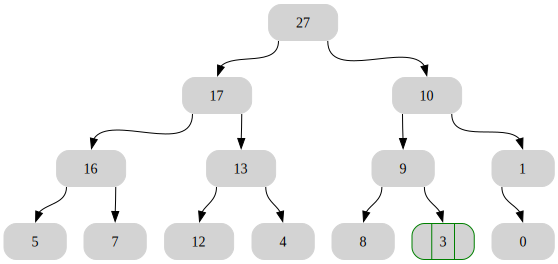

In [9]:
h.swap(5,12)
h.highlight_nodes([12])

### code for min-heapify (6.2-2)
The run time should be the same as max-heapify

In [10]:
def min_heapify(A, i):
    l = left(i)
    r = right(i)
    smallest = i
    '''we assume all child trees of A[i] are min-heaps and try to find the spot for A[i]'''
    if l < len(A) and A[l] < A[i]:
        smallest = l
    if r < len(A) and A[r] < A[smallest]:
        smallest = r
    if smallest != i:
        swap(A, i, smallest)
        min_heapify(A, smallest)
    

### Effect of calling `max_heapify(A,i)` when `A[i]` is larger than its children (6.2-3)
the largest encountered value is equal to `A[i]`, so no swaps take place

### Effect of calling `max_heapify(A,i)` for $i > A.heapsize / 2$ (6.2-4)
It would be like calling it on all leaves, which is useless, because they have no subtrees.

### Iterative instead of recursive implementation of `max_heapify(A,i)` (6.2-5)

### Why is the worst case running time of `max_heapify` on a heap size $n$ is $\Omega(\lg{n})$

$\text{maxheapify}(A, 0) = \Omega(\lg{n})$
- $\text{maxheapify}$ is asymptotically lower-bounded by $\lg{n}$
- $\exists{K}, \exists{N} | \forall n \leq N:  f(n) \geq K\times g(n)$

The maximum number of swaps would be swapping the root all the way down to the deepest leaf, which would take $\lg(n)$ swaps. 

# Building a heap
"bottom up", as in from the leaves to the root

## Helper functions

In [11]:
def all_parents(h:Heap):
    return range(0, h.length//2)
Heap.all_parents = all_parents
del all_parents

def all_leaves(h:Heap):
    return range(h.length//2, h.length)
Heap.all_leaves = all_leaves
del all_leaves

In [12]:
h = MinHeap([1,2,3,4])
h.highlight_nodes(h.all_parents(), label="parents")

TypeError: highlight_nodes() got an unexpected keyword argument 'label'

In [ ]:
h.highlight_nodes(h.all_leaves(), label="leaves")

In [ ]:
A = MinHeap([1,2,3,4,5])
A.highlight_nodes(h.all_parents(), label='parents')

In [ ]:
A.highlight_nodes(A.all_leaves(), label='leaves')

In [ ]:
A = MinHeap([1,2,3,4,5,6])
i = A.all_parents()
A.highlight_nodes(i, label='parents')

In [ ]:
i = A.all_leaves()
A.to_digraph(A, highlights=i, label='leaves')

## `def build_maxheap(A)`

In [ ]:
def build_heap(self):
    '''
    Transforms an unsorted self.ls into a heap
    that abides by self.heap_prop
    '''
    self.heapsize = self.length
    for i in reversed(range(0, self.length//2)):
        self.heapify(i)
    self.log(self)
    return self
Heap.build = build_heap
del build_heap

In [ ]:
original = [27,17,3,16,13,10,1,5,7,12,4,8,9,0]
print(f'original: {original}')
h=MaxHeap(original)
h.build()
print(f'maxheap : {h}')
g,d = h.make_gif()
print(f'g: {g}, d: {d}')

## Exercises

### Illustrate build-max-heap (6.3-1)
Given the input `[5,3,17,10,84,19,6,22,9]`...


In [ ]:
A = MaxHeap([5,3,17,10,84,19,6,22,9])
A.build()
A.to_gif()

In [ ]:
print(A)
print(A.to_gif)
# gif
display_markdown(f"![]({A.to_gif()})", raw = True)

In [ ]:
A = MaxHeap([5,3,17,10,84,19,6,22,9])
i = len(A.ls)//2 - 1

In [ ]:
# run the cell above once... then you can run this one over and over to iterate
A.heapify(i)
i = len(A) // 2 -1 if i < 0 else i-1
h.to_digraph(A, highlights=[i]) if i > -1 -1 else None

### Why decrement the loop index from the midpoint? (6.3-2)
because leafs are trivial max-heaps, and will be ordered as the first half of the array is handled

# The heapsort algorithm

In [ ]:
def heapsort(self:Heap, reverse:bool=False) -> Heap:
    '''
    Takes self.heapsize from self.length to 1, while reordering self.ls
    MaxHeap will give an ascending total order.
    MinHeap will give a descending total order.
    '''

    self.log("before", self)
    self.build()
    for i in reversed(range(1, self.length)):
        self.swap(0, i)
        self.heapsize -= 1
        self.heapify(0)
    if reverse:
        self.ls.reverse()
    self.digraphs.append(self.untree_animation())
    self.log("after", self)
    return self
Heap.sort = heapsort
MaxHeap.sort = lambda self: Heap.sort(self, reverse=True)
MinHeap.sort = lambda self: Heap.sort(self, reverse=False)
del heapsort

In [ ]:
ls = [5,3,17,10,84,19,6,22,9]
print(f'ls: {ls}') 
A = MaxHeap(ls)
A.sort()
A.to_gif()

In [ ]:
print(A)
print(A.to_gif())
display_markdown(f"![]({A.to_gif()})", raw = True)

## Exercises
### Illustrate heapsort (6.4-1)


In [ ]:
A = MaxHeap([5,13,2,25,7,17,20,8,4])
print(A)
A.sort()
display_markdown(f"![]({A.to_gif()})", raw = True)

### Argue the correctness of HeapSort (6.4-2)

```pseudo
1  HeapSort(A)
2      BuildMaxHeap(A)
3      for i = A.length downto 2
4          exchange A[1] with A[i]
5          A.heap-size = A.heap-size - 1
6          MaxHeapify(A, 1)
```

> $\text{Loop Invariant}:$ At the start of each iteration of the **for** loop of lines 2-5,
>  the subarray $A[1..i]$ is a max-heap containing the $i$ smallest elements of $A[1..n]$,
>  and the subarray $A[n+1..n]$ contains the $n-i$ largest elements of  $A[i+1..n]$, sorted.

$\text{Initialization:}$ Before the first iteration, we know that the entirety of $A$ abides by the Loop Invariant because we have proven elsewhere that `BuildMaxHeap` yields a max heap.

$\text{Maintenance:}$ As the for loop iteratively decrements $i$, MaxHeapify is the last function to touch A. This guarantees the Loop Invariant because every child of a max-heap is a max-heap, and callign MaxHeapify has been proven to yeild a maxheap. The size of the resultant maxheap decreases by 1 with every iteration. 

$\text{Termination:}$ At the end of the for loop, all elements will have beeN removed from the max heap, and tehy are all max heaps unto them self

### Time complexity of heapsort (6.4-3)

Regardless of whether A arrives sorted ascendingly or descendingly, the time complexity is $\Theta(n \lg n)$

# Priority Queues
## Supported Methods

### BubbleUp

In [ ]:
def bubbleup(self:Heap, idx, key, idx_predicate:Callable[[int], bool]):
    self.log("before", self)
    assert not key < self[idx], 'new key breaks heap property'
    self[idx] = key
    while idx_predicate(idx) and self.heap_property_violation(self.parent(idx)):
        self.swap(idx, self.parent(idx))
        idx = self.parent(idx)
    self.retree_animation()
    self.log("after", self)
MaxHeap.bubbleup = lambda self, idx, key: bubbleup(self, idx, key, lambda i: i < 0)
MinHeap.bubbleup = lambda self, idx, key: bubbleup(self, idx, key, lambda i: i > 0)
del bubbleup

# def increase_key(self:Heap, i, key):
#     self.log("before", self)
#     assert not key < self[i], 'new key is smaller than current key'
#     self[i] = key
#     while i > 0 and self.heap_property_violation(self.parent(i)):
#         self.swap(i, self.parent(i))
#         i = self.parent(i)
#     self.retree_animation()
#     self.log("after", self)
# MaxHeap.bubbleup = increase_key
# del increase_key

# def decrease_key(self:Heap, i, key):
#     self.log("before", self)
#     assert not key < self[i], 'new key is larger than current key'
#     self[i] = key
#     while i < 0 and self.heap_property_violation(self.parent(i)):
#         self.swap(i, self.parent(i))
#         i = self.parent(i)
#     self.retree_animation()
#     self.log("after", self)
# MinHeap.bubbleup = decrease_key
# del decrease_key

### Peek

In [ ]:
def peek(self:MaxHeap):
    return self[0]
Heap.peek = peek
del peek

### Pop

In [ ]:
def pop(self:MaxHeap):
    self.log('before', self)
    assert self.heapsize > 0, 'heap underflow'
    head = self.peek()
    last = self.heapsize - 1
    self[0] = self[last]
    self.heapsize -= 1
    self.heapify(0)
    self.retree_animation()
    self.log('after', self)
    return head
Heap.pop = pop
del pop

### Insert

In [ ]:
def insert(self:Heap, key, sentinel):
    self.log('before', self)
    self.length += 1
    self.heapsize += 1
    self.ls.append(sentinel)
    self.increase_key(self.heapsize-1, key)
    self.retree_animation()
    self.log('after', self)
Heap.insert = insert
MaxHeap.insert = lambda self, key: Heap.insert(self, key, float('-inf'))
MinHeap.insert = lambda self, key: Heap.insert(self, key, float('inf'))

In [ ]:
h = maxheap([0,1,2,3,4,5])
h.build()
h.digraphs[-1]

In [ ]:
h = MaxHeap(h.ls)
h.heapsize = len(h.ls)
h.insert(55)
h.digraphs[-1]

In [ ]:
##### h.extract_max()
h.digraphs[-1]

In [ ]:
h.untree_animation()
print(h.ls)
h.digraphs[-1]

# Priority Queues
